In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# importing the data
data=pd.read_csv("E:\\download\\50_Startups.csv")
data[0:5]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# collecting information for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data_1 = data.rename({'R&D Spend':'RDS','Marketing Spend':'MS'},axis=1)
data_1[0:5]

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data_1.corr()

,RDS,Administration,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
# model building
model=smf.ols("Profit~RDS+Administration+MS",data=data_1).fit()

In [7]:
model.fittedvalues[0:5]

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [8]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [9]:
data_1['errorrs']=model.resid
data_1[0:5]

,RDS,Administration,MS,State,Profit,errorrs
0,165349.20,136897.80,471784.10,New York,192261.83,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,-5951.574183


In [10]:
model.pvalues

Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64

In [11]:
# Building SLRM for Administration data having insignificant p values
m1_a=smf.ols("Profit~Administration",data=data_1).fit()
m1_a.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [12]:
# Building SLRM for MS data having insignificant p values
m1_m=smf.ols("Profit~MS",data=data_1).fit()
m1_m.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [13]:
m1_am=smf.ols("Profit~Administration+MS",data=data_1).fit()
m1_am.pvalues

Intercept         2.589341e-01
Administration    1.729198e-02
MS                9.727245e-11
dtype: float64

# Calculation of VIF (Variance inflation Factor)

In [14]:
rsq_r=smf.ols("RDS~Administration+MS",data=data_1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDS+MS",data=data_1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RDS+Administration",data=data_1).fit().rsquared
vif_m=1/(1-rsq_m)



In [15]:
# Sorting VIF values into Dataframe 
d1={'Variables':['RDS','Administration','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,RDS,2.468903
1,Administration,1.175091
2,MS,2.326773


Consider all the three values because Vif is not very high

# Residual analysis

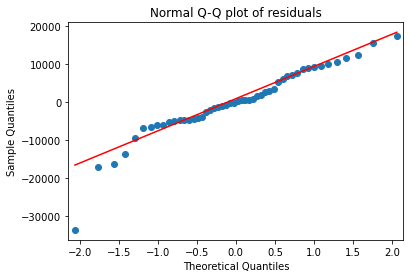

In [16]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

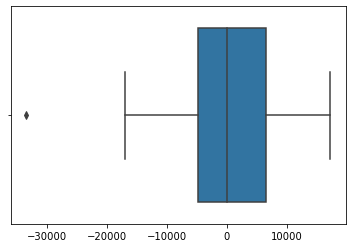

In [17]:
sns.boxplot(model.resid)

The box plot shows that the errors are normally distributed

# Residual plot for Homoscedasticity

In [18]:
def get_standardized_values(vals): 
    return (vals-vals.mean())/vals.std()

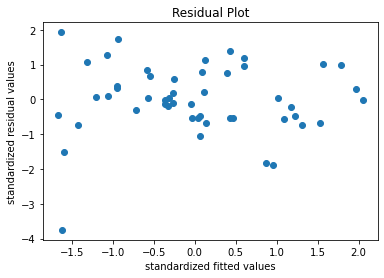

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

This shows that residual and fitted value does not show any type of correlation


# So, model does not require any transformation

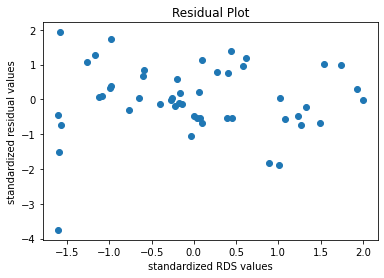

In [20]:
plt.scatter(get_standardized_values(data_1['RDS']),
            get_standardized_values(data_1['errorrs']))
plt.title('Residual Plot')
plt.xlabel('standardized RDS values')
plt.ylabel('standardized residual values')
plt.show() 

# This value also does not require transformation

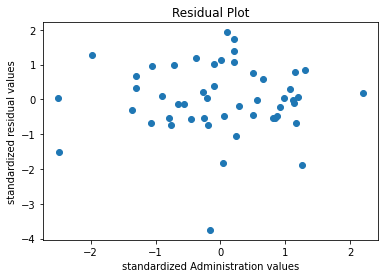

In [21]:
plt.scatter(get_standardized_values(data_1['Administration']),
            get_standardized_values(data_1['errorrs']))
plt.title('Residual Plot')
plt.xlabel('standardized Administration values')
plt.ylabel('standardized residual values')
plt.show() 

# This value does not require transformation

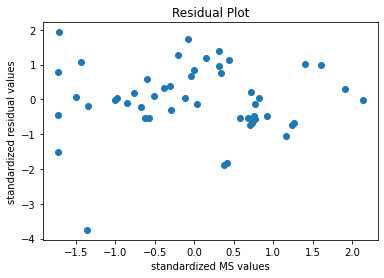

In [22]:
plt.scatter(get_standardized_values(data_1['MS']),
            get_standardized_values(data_1['errorrs']))
plt.title('Residual Plot')
plt.xlabel('standardized MS values')
plt.ylabel('standardized residual values')
plt.show() 

# This value does not require transformation

# COOK'S DISTANCE

In [23]:
data_1.shape

(50, 6)

In [24]:
# Finding the cook's distance
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

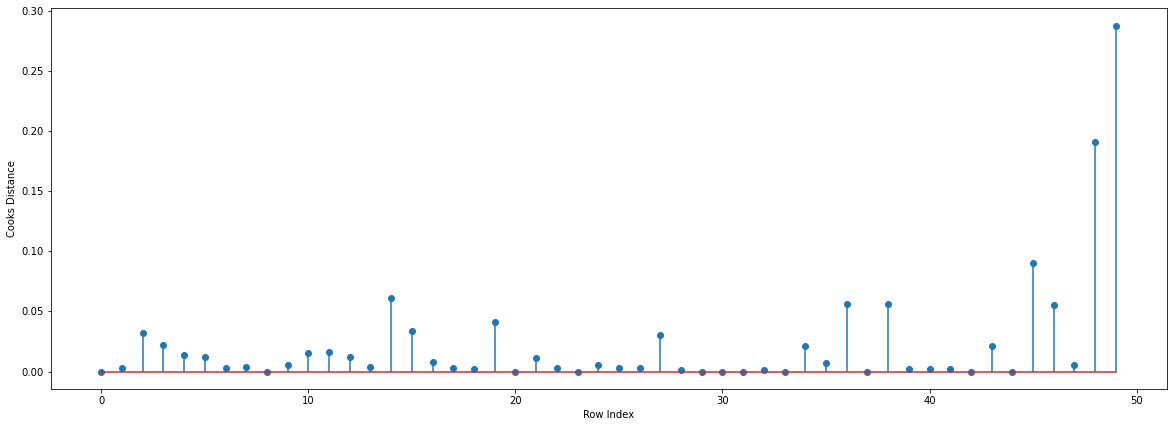

In [25]:
# plot the influencers values using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data_1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
# Index and value of influencer where C is greater than 0.5
(np.argmax(c), np.max(c))

(49, 0.28808229275432634)

# High influence point

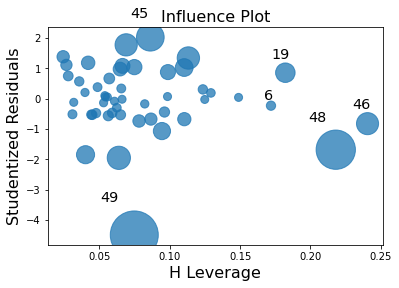

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
# Leverage Cuttoff Value
n = 50     # Number of rows
k = 4      # Number of indipendent column
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

# Improving model 

In [29]:
# Discarding the values which has cook distance greater than and equal to leverage cutoff 
data_2=data_1.drop(data_1.index[[49]],axis=0).reset_index(drop=True)
data_2

,RDS,Administration,MS,State,Profit,errorrs
0,165349.20,136897.80,471784.10,New York,192261.83,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,-5124.724110


# Final model

In [30]:
model_2=smf.ols("Profit~RDS+Administration+MS",data=data_2).fit()
model_2

In [31]:
while model_2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model_2=smf.ols("Profit~RDS+Administration+MS",data=data_2).fit()
        (c,_)=model_2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data_2=data_2.drop(data_2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data_2
    else:
        final_model=smf.ols("Profit~RDS+Administration+MS",data=data_2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [32]:
round(final_model.rsquared,5) 

0.98828

In [33]:
data_2

,RDS,Administration,MS,State,Profit,errorrs
0,142107.34,91391.77,366168.42,Florida,166187.94,-5951.574183
1,131876.90,99814.71,362861.36,New York,156991.12,-6589.660571
2,130298.13,145530.06,323876.68,Florida,155752.60,-4268.763048
3,120542.52,148718.95,311613.29,New York,152211.77,470.070301
4,123334.88,108679.17,304981.62,California,149759.96,-5124.724110
5,91992.39,135495.07,252664.93,California,134307.35,6819.358337
6,94657.16,145077.58,282574.31,New York,125370.37,-4822.077208
7,91749.16,114175.79,294919.57,Florida,124266.90,-4747.326806
8,76253.86,113867.30,298664.47,California,118474.03,1834.360769
9,67532.53,105751.03,304768.73,Florida,108733.99,-1262.625221


In [37]:
# new data prediction
new_data=pd.DataFrame({'RDS':60000,"Administration":80000,"MS":130000},index=[0])
new_data

,RDS,Administration,MS
0,60000,80000,130000


In [38]:
# manual predicted values
final_model.predict(new_data)

0    97193.718531
dtype: float64

In [41]:
# Automatic Prediction of data
pred = final_model.predict(data_2)
pred

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [42]:
# Calculation of rsquared values for prepared model
d2 = {'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
